### Lets Grow More
### Data Science Intern

### Name: Allwin Steve Paul



Task-3:  Prediction using Decision Tree  Algorithm :

Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz


In [87]:
#importing csv fle
iris_data = pd.read_csv('Iris.csv')

In [88]:
iris_data.shape

(150, 6)

In [89]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [90]:
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [91]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [92]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [93]:
iris_data.min()

Id                         1
SepalLengthCm            4.3
SepalWidthCm               2
PetalLengthCm              1
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [94]:
iris_data.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [95]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [96]:
iris_data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [97]:
iris_data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [98]:
iris_data = iris_data.drop(columns=['Id'])
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
iris_data.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [100]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [101]:
iris_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

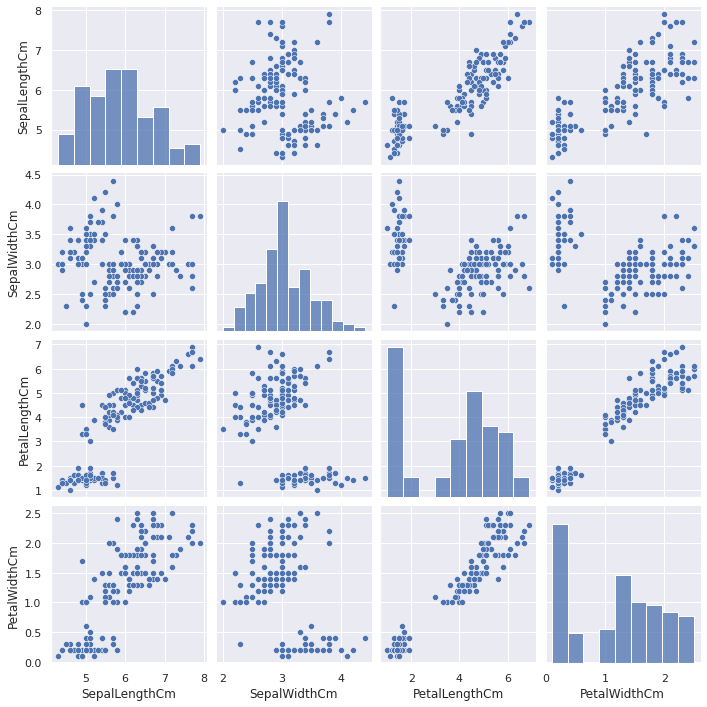

In [102]:
sns.pairplot(iris_data) #visualising the dataset

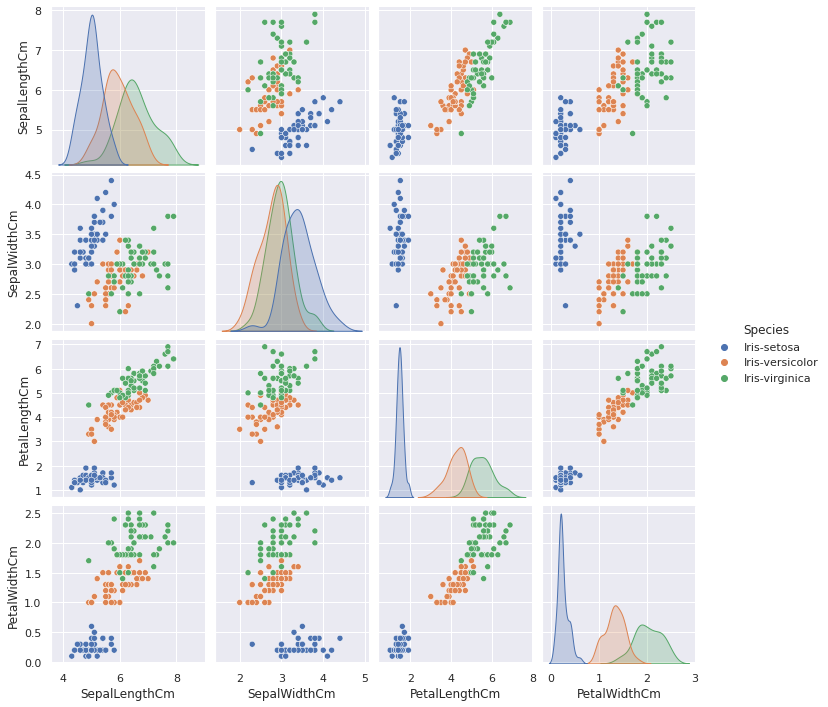

In [103]:
sns.pairplot(iris_data,hue='Species')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc2b912190>,
      dtype=object)

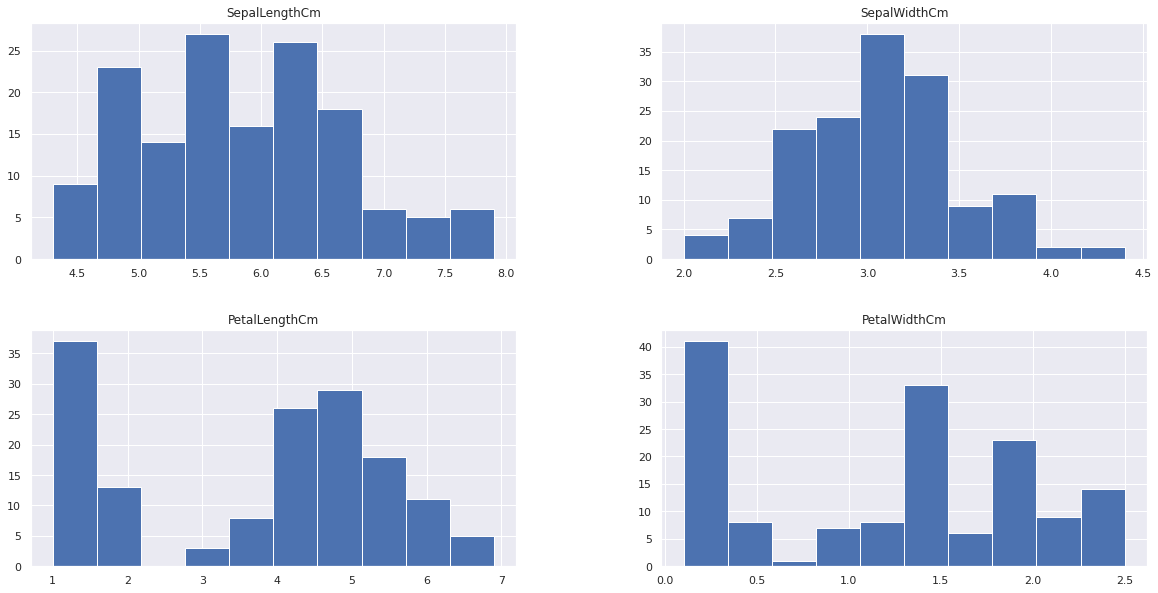

In [104]:
sns.set(rc={'figure.figsize':(20,10)})
iris_data.hist()

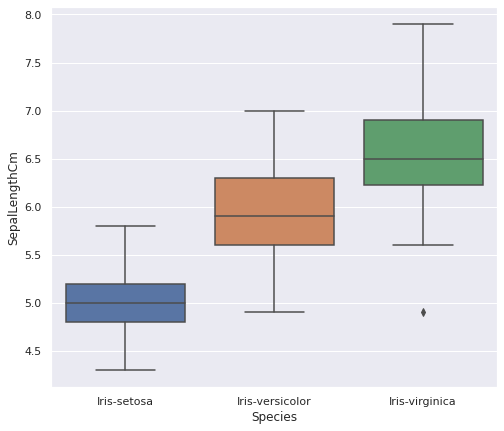

In [105]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='SepalLengthCm',data=iris_data)

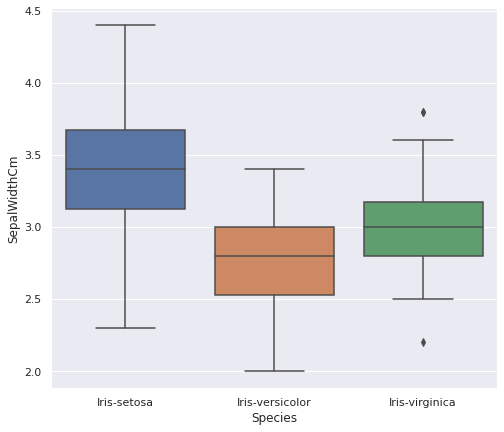

In [106]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='SepalWidthCm',data=iris_data)

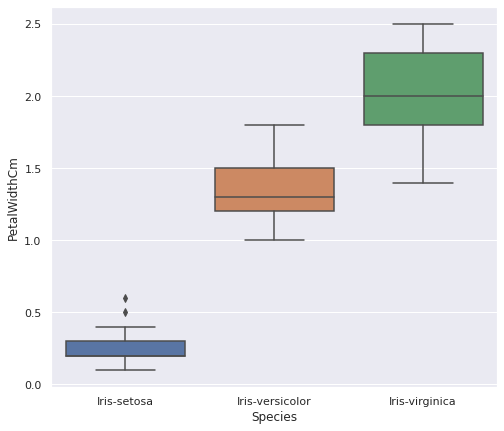

In [107]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='PetalWidthCm',data=iris_data)

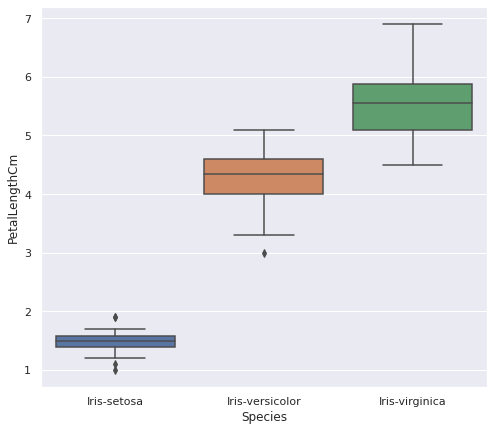

In [108]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='PetalLengthCm',data=iris_data)

In [109]:
colors = ['blue', 'orange', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

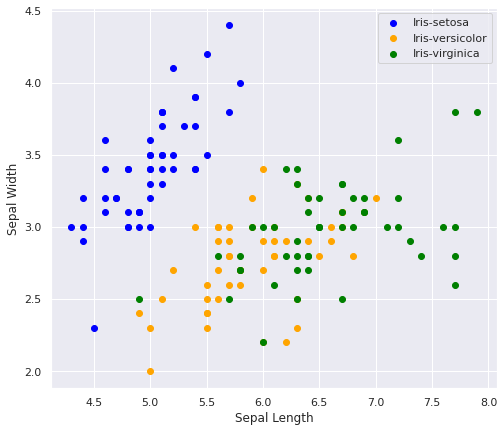

In [110]:
for i in range(3):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x=x['SepalLengthCm'], y=x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

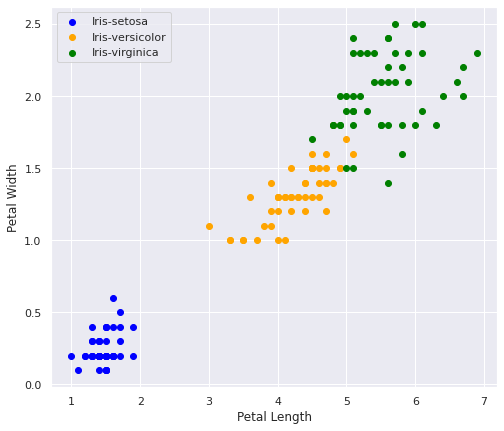

In [111]:
for i in range(3):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x=x['PetalLengthCm'], y=x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

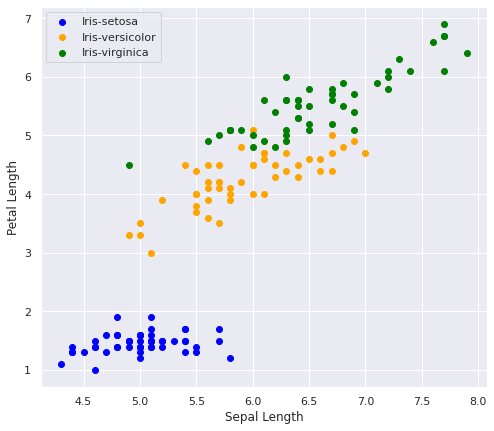

In [112]:
for i in range(3):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x=x['SepalLengthCm'], y=x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

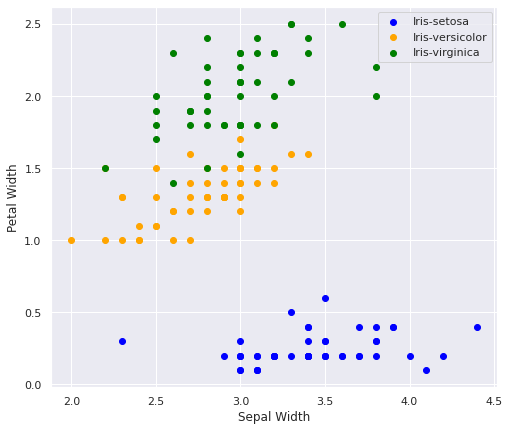

In [113]:
for i in range(3):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x=x['SepalWidthCm'], y=x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

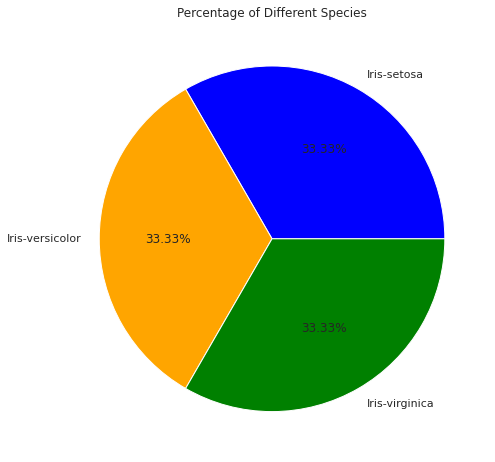

In [114]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_axes([0,0,1,1])
colors = ['blue','orange','green']
sp = iris_data['Species'].unique()
vc = iris_data['Species'].value_counts()
ax.pie(vc, labels=sp, autopct='%1.2f%%', colors=colors)
plt.title('Percentage of Different Species')
plt.show()

In [115]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


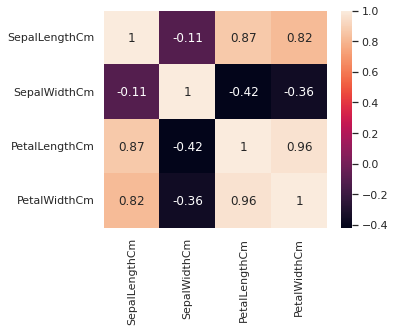

In [116]:
corr = iris_data.corr()
plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True)

In [117]:
dc = DecisionTreeClassifier()

In [118]:
X = iris_data.drop(['Species'], axis=1)
y = iris_data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [119]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [120]:
print(dc.score(X_test, y_test)*100)

95.55555555555556


In [121]:
y_pred = dc.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [122]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is:",accuracy)


Accuracy is: 0.9555555555555556


In [123]:
cr = classification_report(y_test, y_pred)
print('Classification Report:',cr)

Classification Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [124]:
features = iris_data.columns[:4]
classes = iris_data['Species'].unique().tolist()

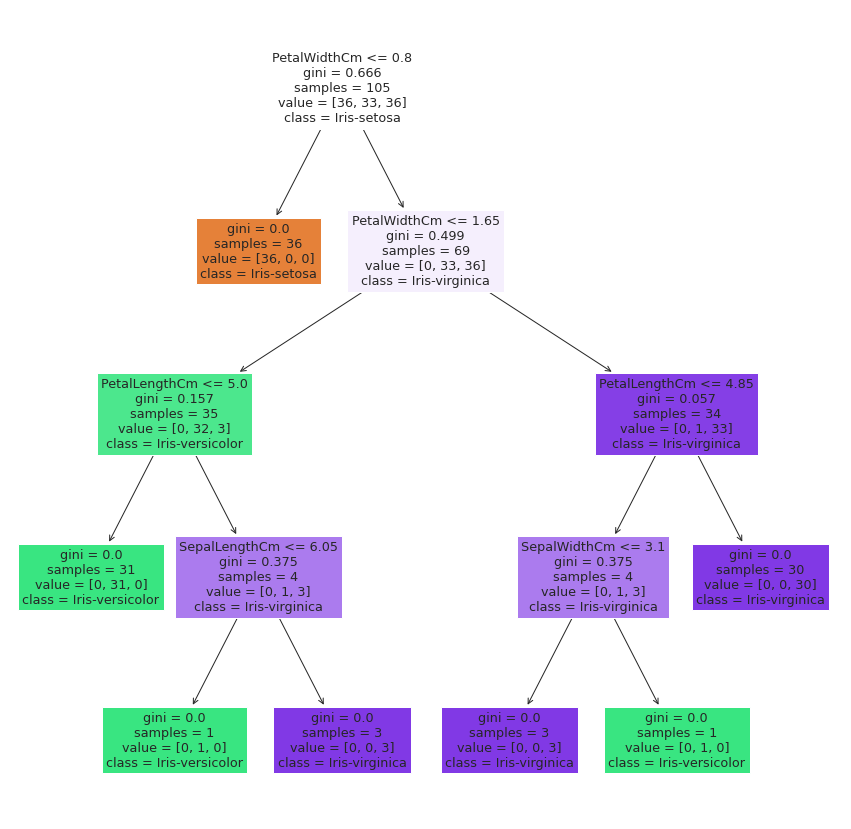

In [125]:
plt.figure(figsize=(15,15))
plot_tree(dc, feature_names = features, class_names = classes, filled = True)
plt.show()